## Import Library

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Define Variables

In [6]:
PATH_INTENTS = '../data/intents.json'

## Load Data

In [7]:
with open(PATH_INTENTS, 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [8]:
# Creating table from dataframe
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


## Exploratory Data Analysis

In [9]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

### Word Cloud

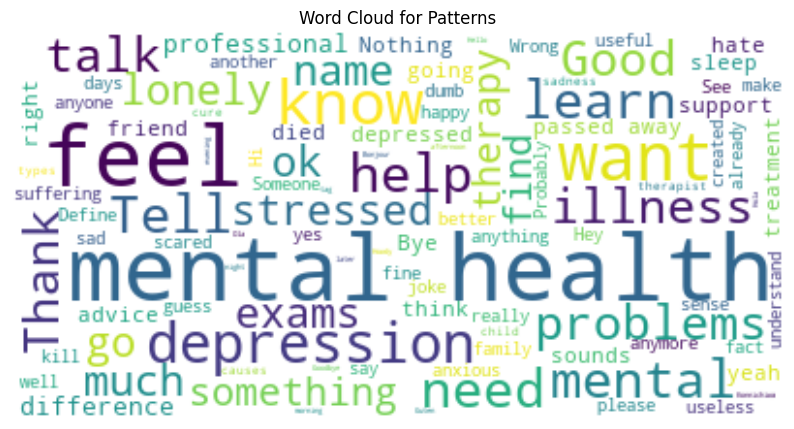

In [10]:
# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Patterns')
plt.show()

### Patterns Length Distribution

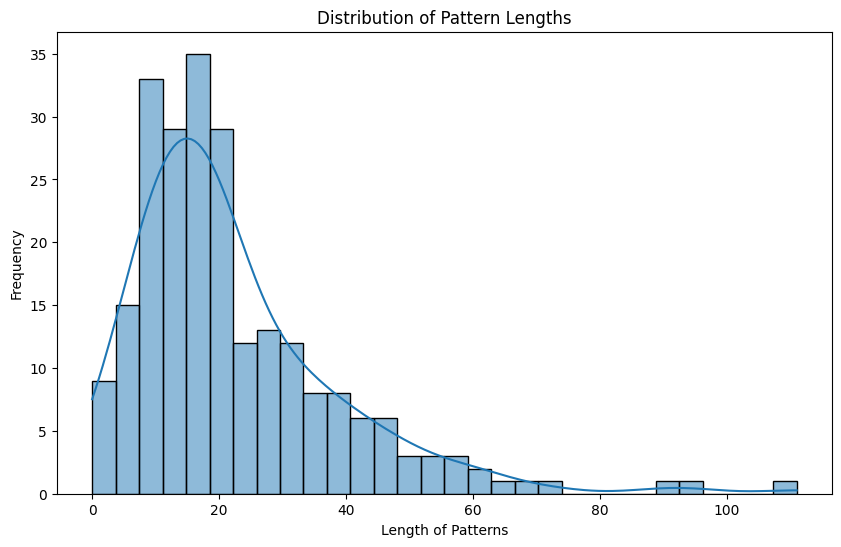

In [11]:
df['pattern_length'] = df['patterns'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

### Distribution of Intents

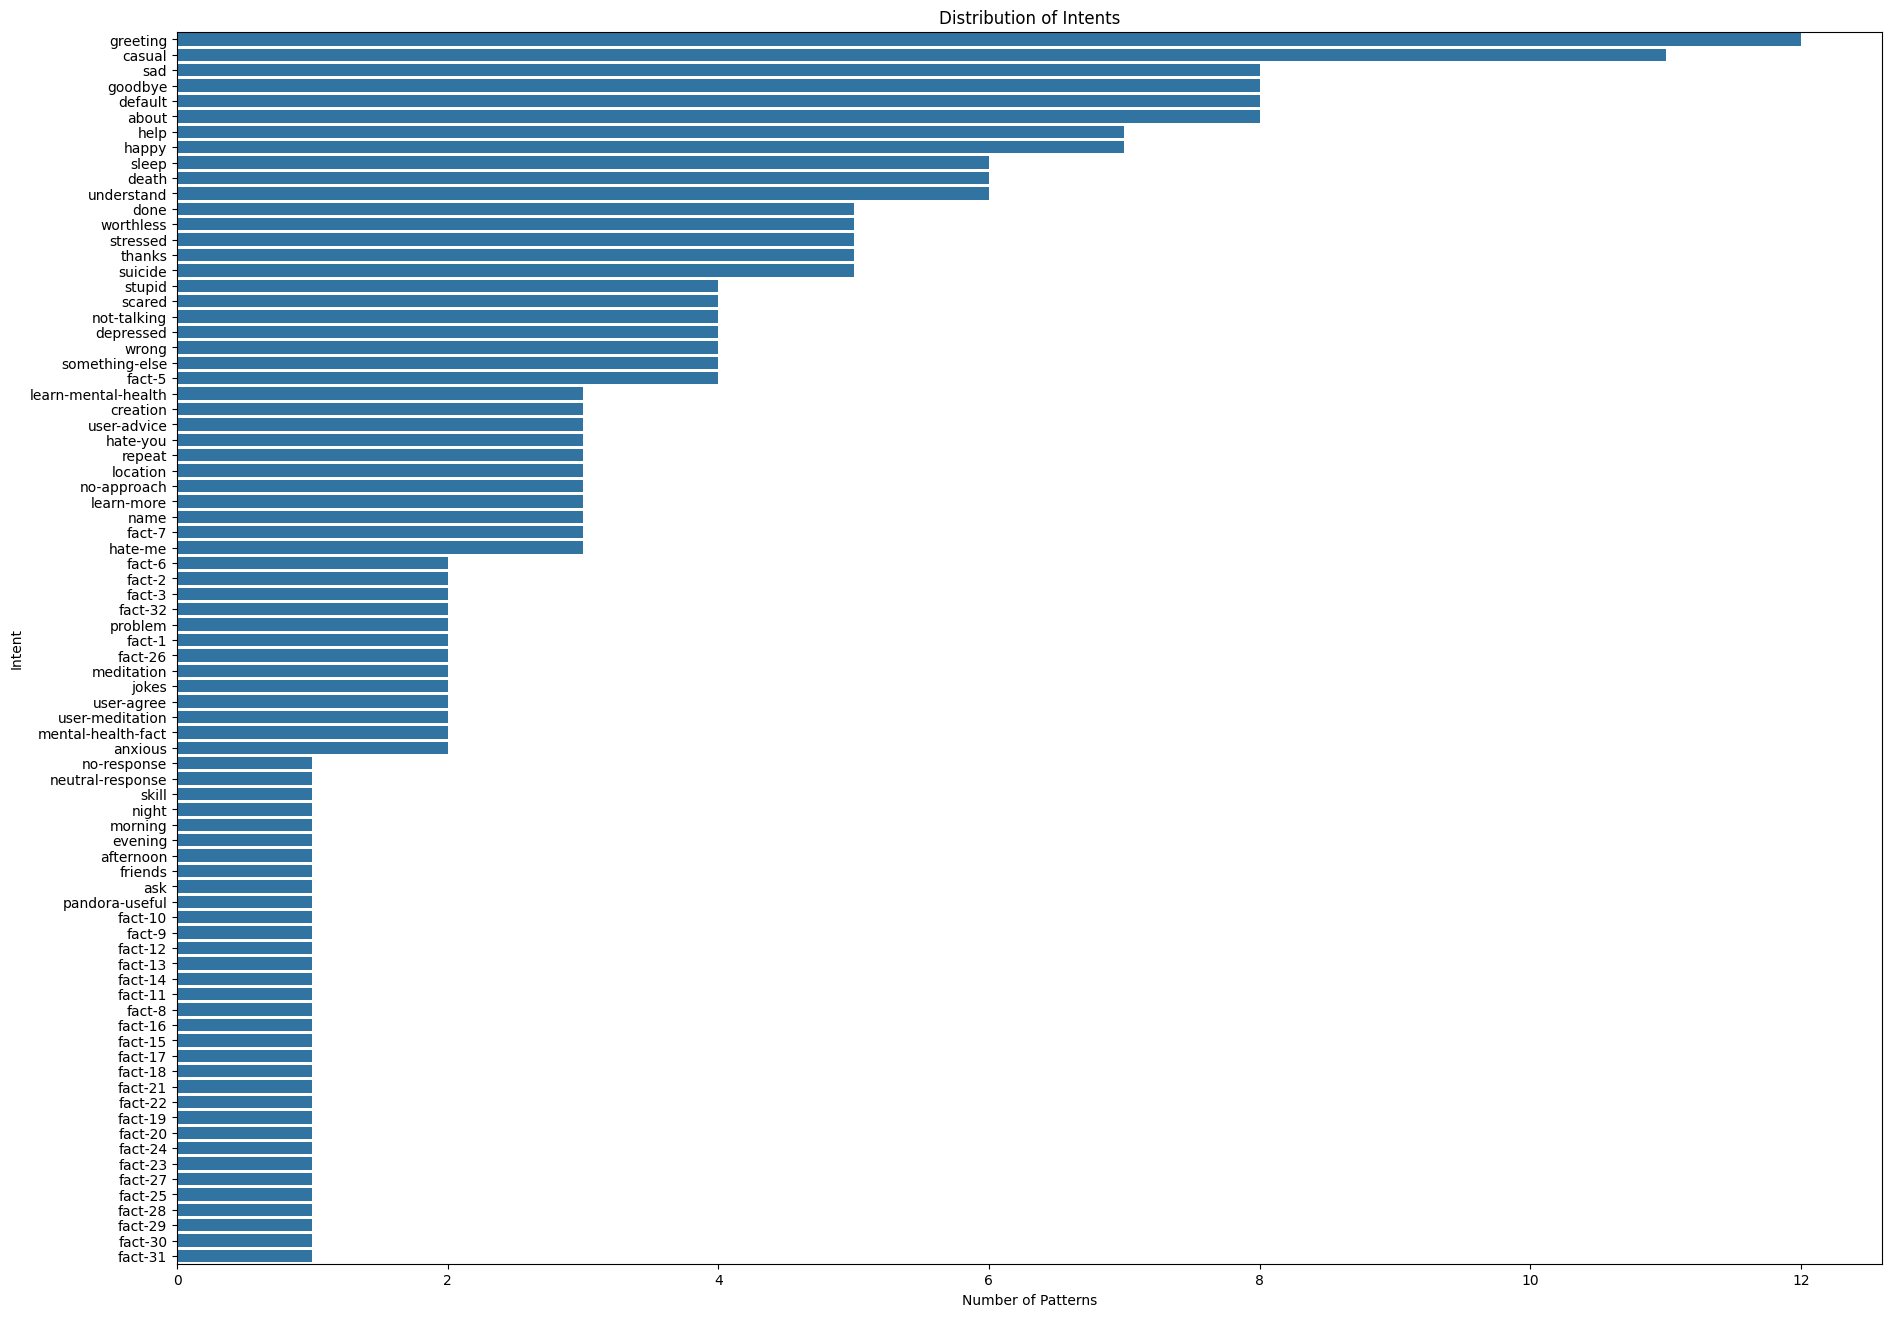

In [12]:
plt.figure(figsize=(22, 16))
sns.countplot(y='tag', data=df, order=df['tag'].value_counts().index)
plt.title('Distribution of Intents')
plt.xlabel('Number of Patterns')
plt.ylabel('Intent')
plt.show()

### Number of Unique Responses per Intent

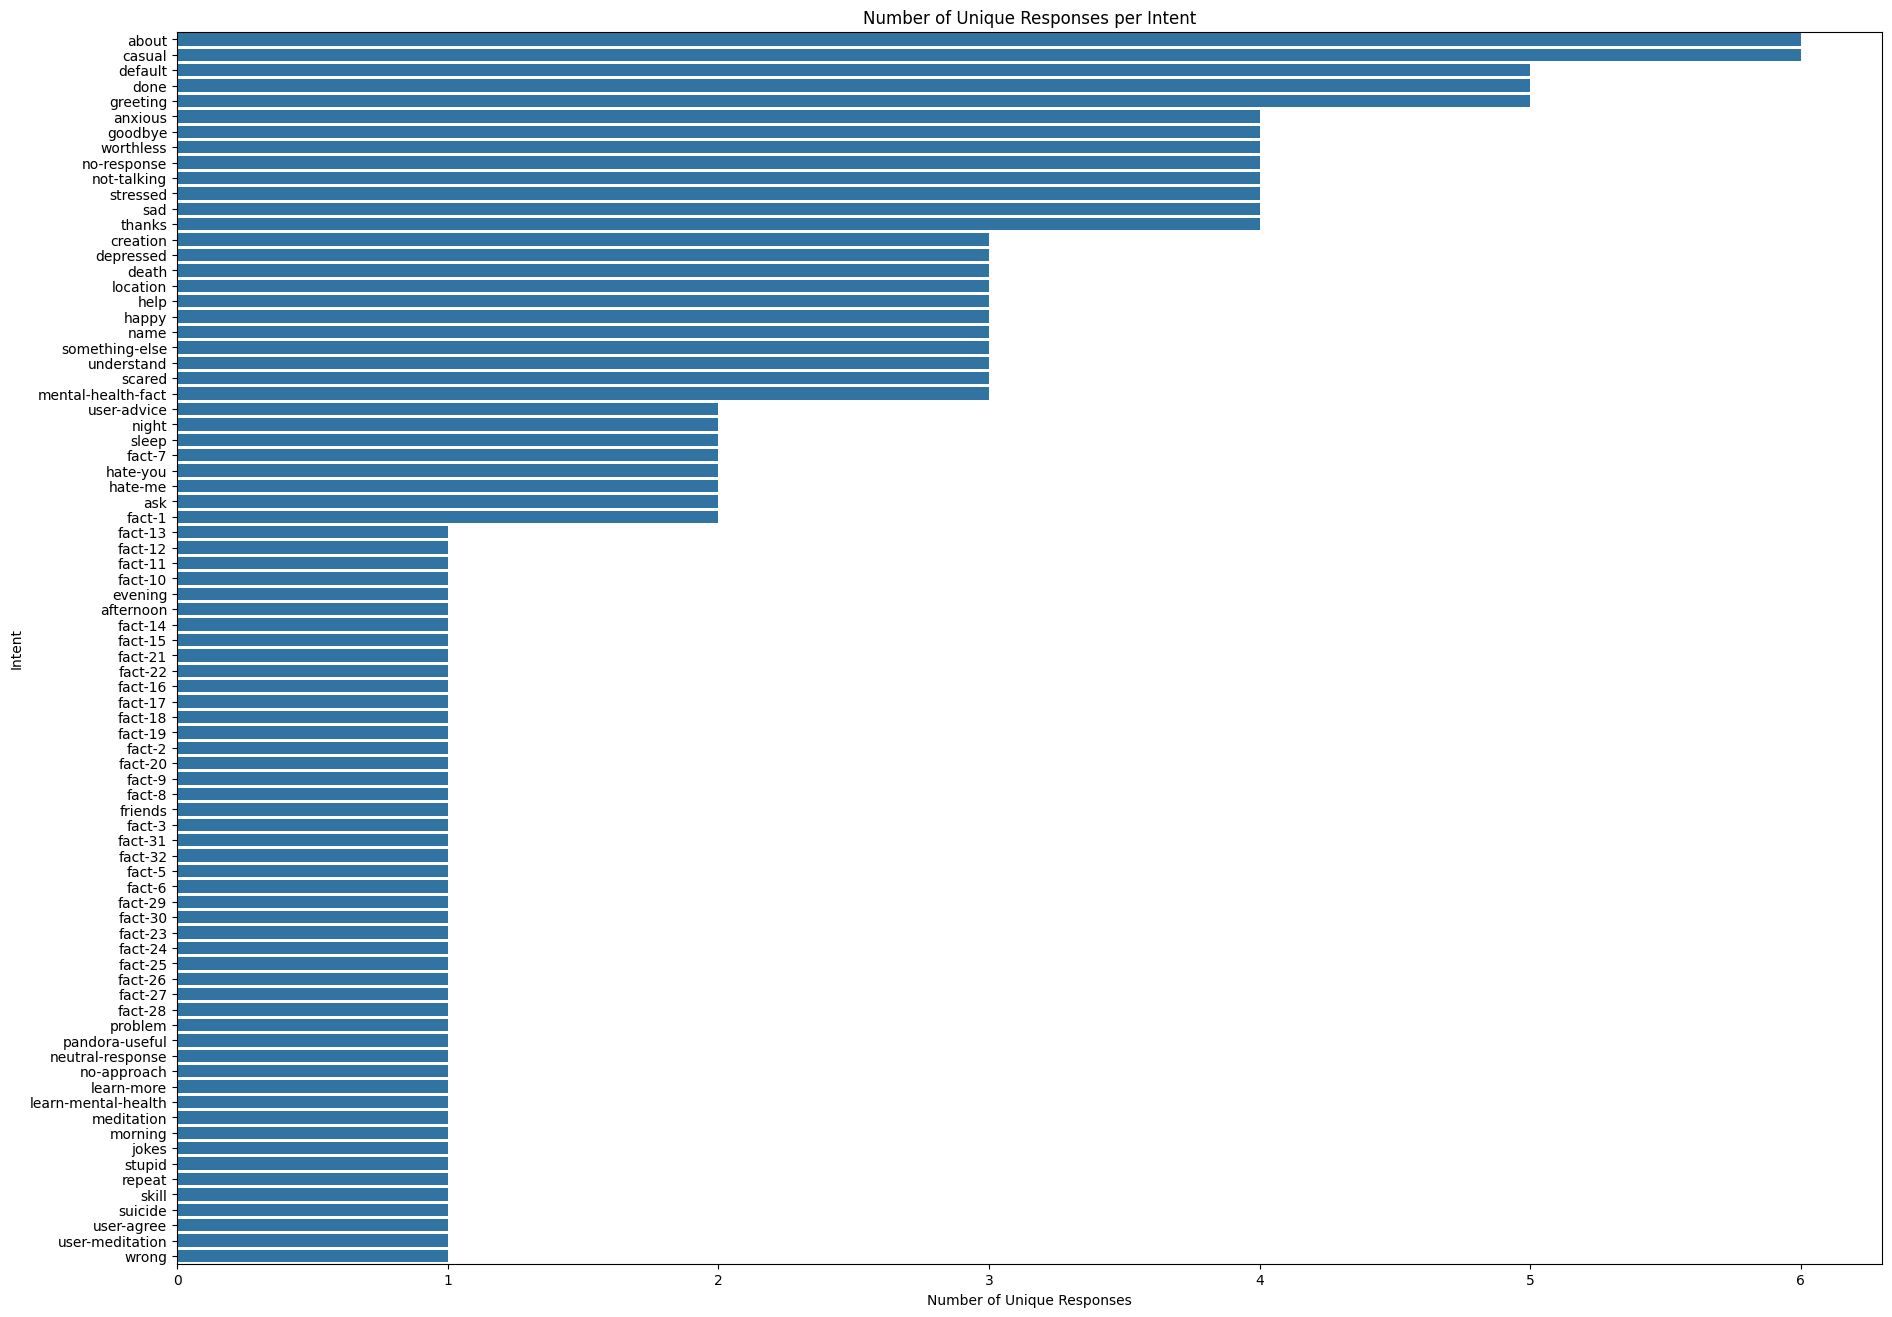

In [13]:
# 3. Number of Unique Responses per Intent
df_unique_responses = df_responses.groupby('tag')['responses'].nunique().reset_index(name='unique_responses')
plt.figure(figsize=(22, 16))
sns.barplot(x='unique_responses', y='tag', data=df_unique_responses.sort_values('unique_responses', ascending=False))
plt.title('Number of Unique Responses per Intent')
plt.xlabel('Number of Unique Responses')
plt.ylabel('Intent')
plt.show()

### Response Length Distribution

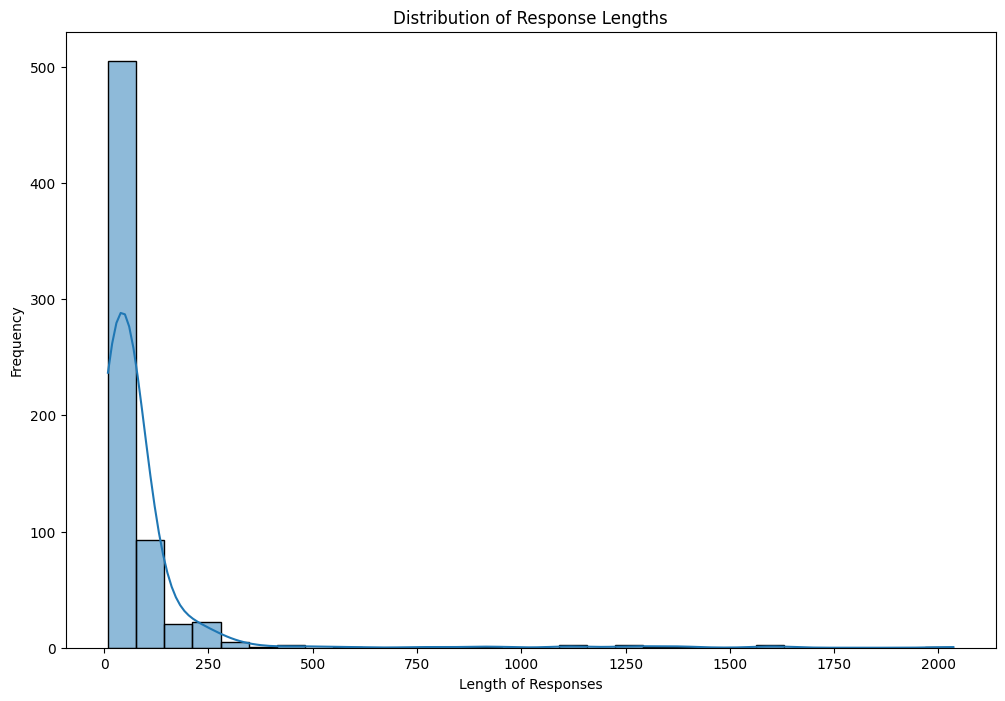

In [14]:
# Calculating response lengths from the exploded DataFrame
df_responses['response_length'] = df_responses['responses'].apply(len)
plt.figure(figsize=(12, 8))
sns.histplot(df_responses['response_length'], bins=30, kde=True)
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Responses')
plt.ylabel('Frequency')
plt.show()